In [124]:
# Importing the required libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.preprocessing as prep
from sklearn.decomposition import PCA

In [125]:
# Changing working directory and reading file to bf

os.chdir(r'C:\buan6383')
bf = pd.read_csv(r'data\boxOffice.csv')
bf

,box,G,PG,PG13,budget,starpowr,sequel,action,comedy,animated,horror,addict,cmngsoon,fandango,cntwait3
0,19167085,0,0,0,28.0,19.83,0,0,1,0,0,7860.500000,10,144,0.49
1,63106589,0,1,0,150.0,32.69,1,0,0,1,0,5737.000000,59,468,0.79
2,5401605,0,0,0,37.4,15.69,0,0,1,0,0,850.000000,24,198,0.36
3,67528882,0,0,1,200.0,23.62,1,1,0,0,0,15326.000000,93,1778,0.76
4,26223128,0,1,0,150.0,19.02,0,0,0,1,0,4574.250000,30,1109,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,59321095,0,1,0,175.0,34.86,0,0,0,1,0,9085.500000,68,647,0.70
58,5329240,0,0,1,22.0,4.25,0,1,0,0,0,3186.000000,94,39,0.62
59,23004765,0,0,1,16.7,5.96,0,0,0,0,1,17584.000000,58,122,0.53
60,70950500,0,0,1,85.0,16.62,1,1,0,0,0,10609.666670,594,849,0.71


## Question 1

array([[<Axes: title={'center': 'box'}>,
        <Axes: title={'center': 'budget'}>],
       [<Axes: title={'center': 'starpowr'}>, <Axes: >]], dtype=object)

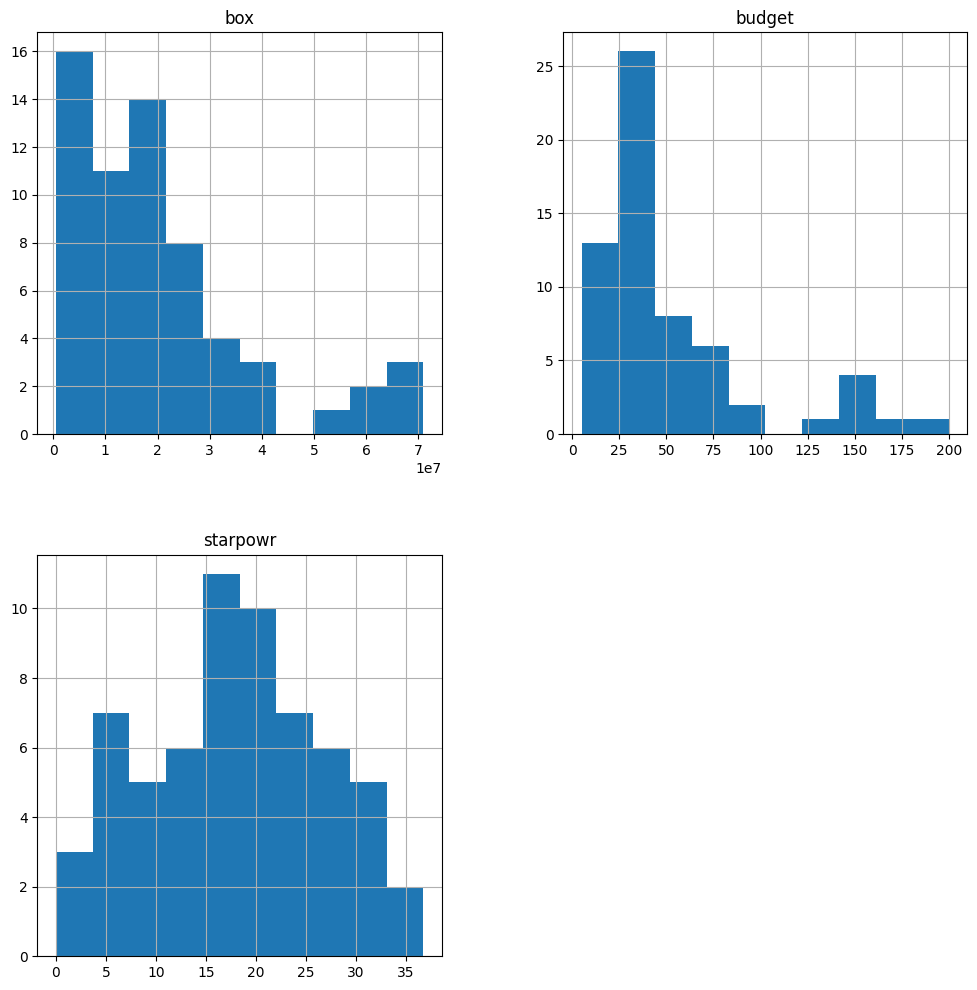

In [126]:
# Plotting histograms of variables to check their distribution

bf.hist(column = ['box', 'budget', 'starpowr'], bins=10, figsize=(12,12))

In [127]:
# Log transforming the variables which have right skew

bf['log10_box'] = np.log10(bf['box'])
bf['log10_budget'] = np.log10(bf['budget'])

# PLOTTING HISTOGRAM OF THE TRANSFORMED VARIABLES

array([[<Axes: title={'center': 'log10_box'}>,
        <Axes: title={'center': 'log10_budget'}>],
       [<Axes: title={'center': 'starpowr'}>, <Axes: >]], dtype=object)

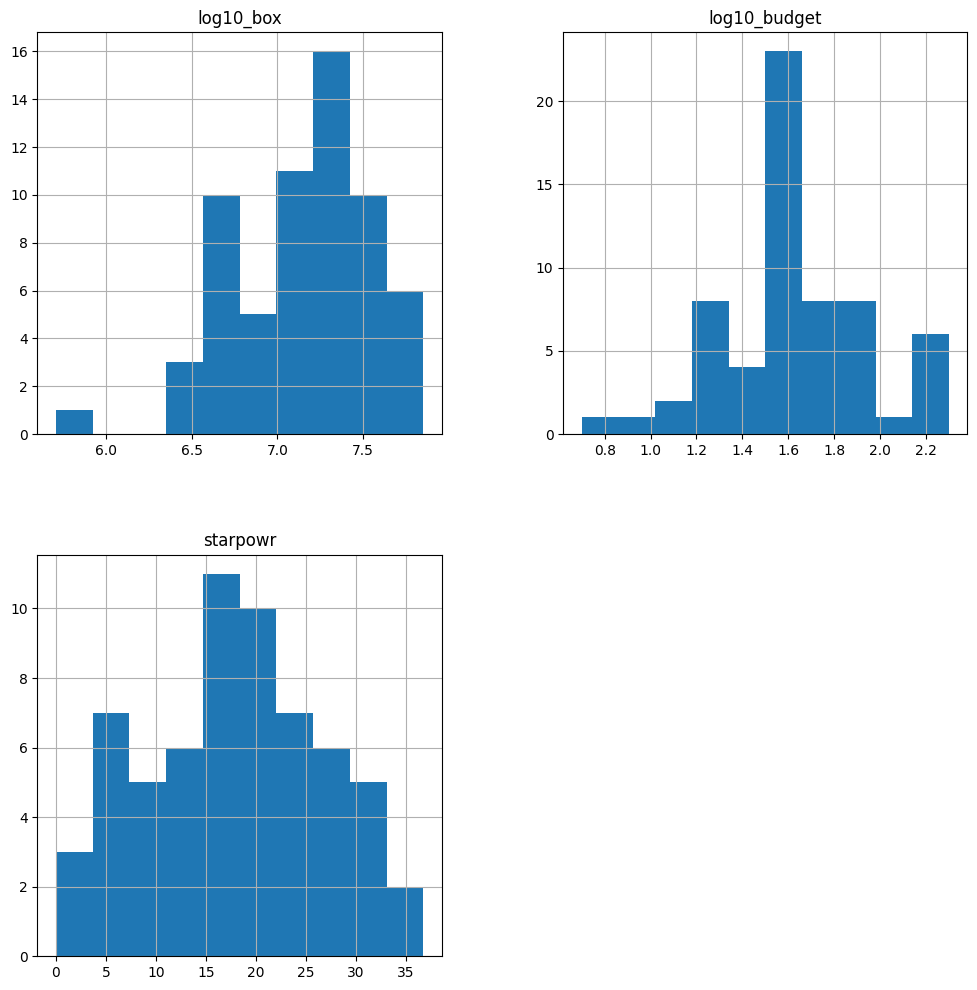

In [128]:
# Transformed variables box and budget

bf.hist(column=['log10_box', 'log10_budget', 'starpowr'], bins=10, figsize=(12,12))

## Question 2

In [129]:
# Specifying the dependent variable
y = bf['log10_box']

# copying the dataframe
x = bf.copy()

# Dropping the unnecessary variables
x = x.drop(['box', 'addict', 'cmngsoon', 'fandango', 'cntwait3', 'budget', 'log10_box'], axis =1)

x1 = x.copy()

# Adding const to store the intercept coefficient
x1['const'] = 1.0

print(x1.head())

   G  PG  PG13  starpowr  sequel  action  comedy  animated  horror  \
0  0   0     0     19.83       0       0       1         0       0   
1  0   1     0     32.69       1       0       0         1       0   
2  0   0     0     15.69       0       0       1         0       0   
3  0   0     1     23.62       1       1       0         0       0   
4  0   1     0     19.02       0       0       0         1       0   

   log10_budget  const  
0      1.447158    1.0  
1      2.176091    1.0  
2      1.572872    1.0  
3      2.301030    1.0  
4      2.176091    1.0  


In [130]:
# Creating the regression model
linreg1 = sm.OLS(y,x1).fit()

print(linreg1.summary())

                            OLS Regression Results                            
Dep. Variable:              log10_box   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     2.656
Date:                Sun, 11 Feb 2024   Prob (F-statistic):             0.0109
Time:                        19:21:20   Log-Likelihood:                -19.122
No. Observations:                  62   AIC:                             60.24
Df Residuals:                      51   BIC:                             83.64
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
G                0.1096      0.301      0.365   

# Question 3

In [131]:
# Regression with significant variables from Question 2

# Specifying the dependent variable
y = bf['log10_box']

# copying the dataframe
x2 = bf.copy()

# Dropping the unnecessary variables
x2 = x2.drop(['box', 'addict', 'cmngsoon', 'fandango', 'cntwait3', 'budget', 'log10_box', 'G','PG','PG13','starpowr','action', 'comedy', 'animated'], axis =1)

x3 = x2.copy()

# Adding const to store the intercept coefficient
x3['const'] = 1.0

print(x3.head())

   sequel  horror  log10_budget  const
0       0       0      1.447158    1.0
1       1       0      2.176091    1.0
2       0       0      1.572872    1.0
3       1       0      2.301030    1.0
4       0       0      2.176091    1.0


In [132]:
# Creating the regression model
linreg2 = sm.OLS(y, x3).fit()
print(linreg2.summary())

                            OLS Regression Results                            
Dep. Variable:              log10_box   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     7.929
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           0.000162
Time:                        19:21:20   Log-Likelihood:                -21.465
No. Observations:                  62   AIC:                             50.93
Df Residuals:                      58   BIC:                             59.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sequel           0.2169      0.129      1.676   

# Question 4

array([[<Axes: title={'center': 'addict'}>,
        <Axes: title={'center': 'cmngsoon'}>],
       [<Axes: title={'center': 'fandango'}>,
        <Axes: title={'center': 'cntwait3'}>]], dtype=object)

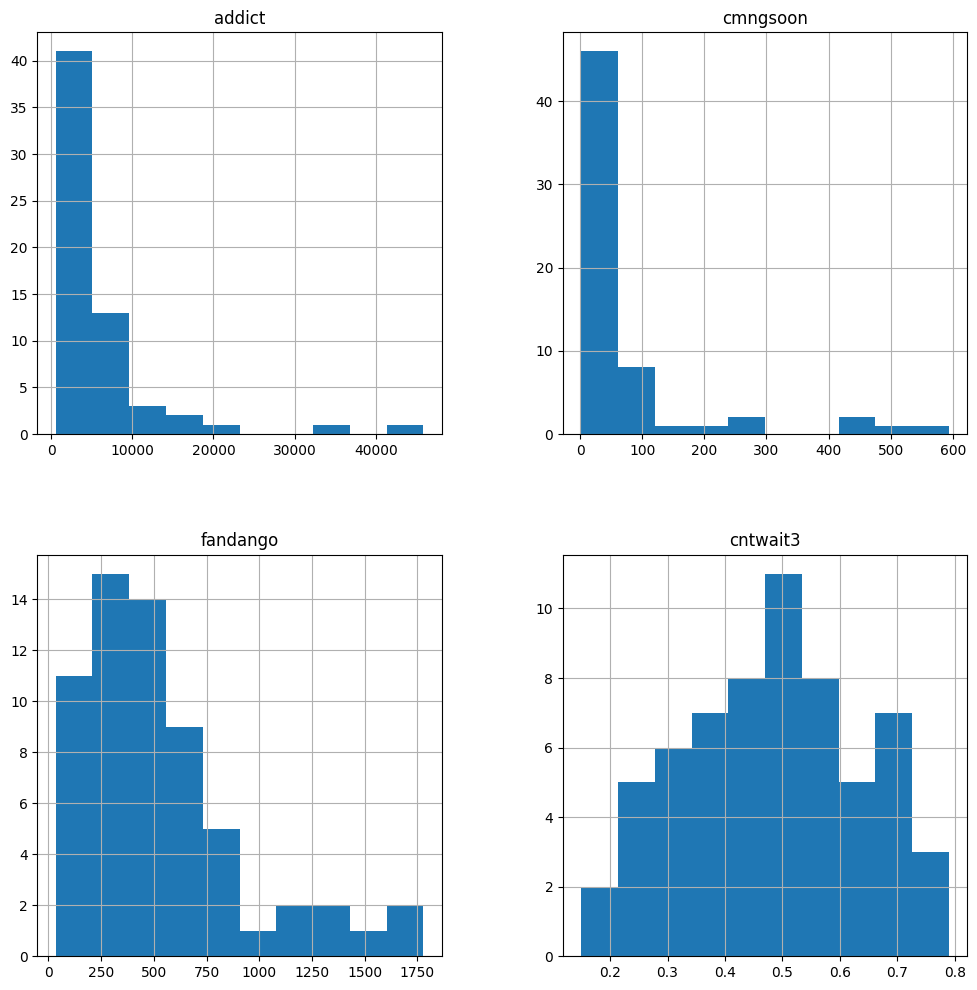

In [133]:
# Histogram of buzz variables
bf.hist(column=['addict', 'cmngsoon', 'fandango','cntwait3' ], bins=10, figsize=(12,12))

In [134]:
# Log transforming the variables with right skew
bf['log10_addict'] = np.log10(bf['addict'])
bf['log10_cmngsoon'] = np.log10(bf['cmngsoon'])
bf['log10_fandango'] = np.log10(bf['fandango'])

# PLOTTING HISTOGRAM OF THE TRANSFORMED VARIABLES

array([[<Axes: title={'center': 'log10_addict'}>,
        <Axes: title={'center': 'log10_cmngsoon'}>],
       [<Axes: title={'center': 'log10_fandango'}>,
        <Axes: title={'center': 'cntwait3'}>]], dtype=object)

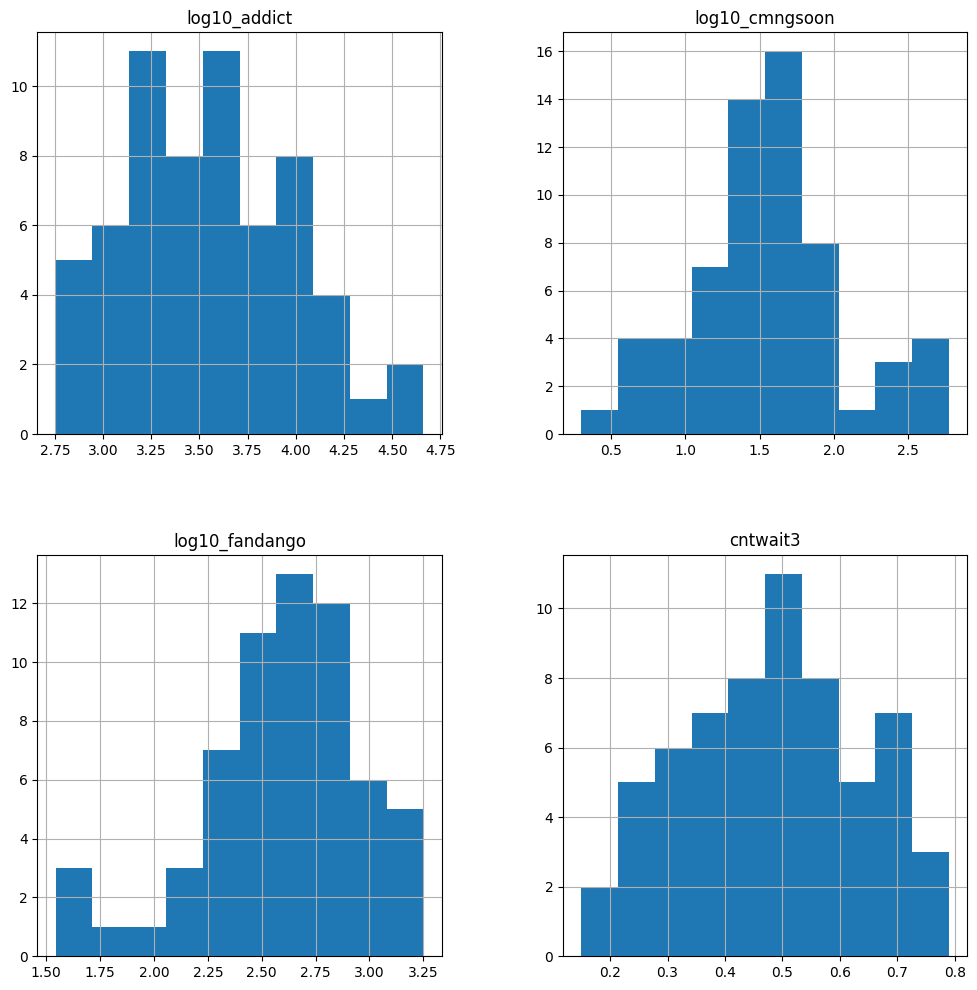

In [135]:
bf.hist(column=['log10_addict', 'log10_cmngsoon', 'log10_fandango','cntwait3'], bins=10, figsize=(12,12))

# Question 5

In [136]:
# Regression using all independent variables including buzz variables
# Specifying the dependent variable
y = bf['log10_box']

x4 = bf.copy()

# Dropping the unnecessary variables
x4 = x4.drop(['box','log10_box','budget', 'addict', 'cmngsoon', 'fandango'], axis =1)

x5 = x4.copy()

# Adding const to store the intercept coefficient
x5['const'] = 1.0

print(x5.head())

   G  PG  PG13  starpowr  sequel  action  comedy  animated  horror  cntwait3  \
0  0   0     0     19.83       0       0       1         0       0      0.49   
1  0   1     0     32.69       1       0       0         1       0      0.79   
2  0   0     0     15.69       0       0       1         0       0      0.36   
3  0   0     1     23.62       1       1       0         0       0      0.76   
4  0   1     0     19.02       0       0       0         1       0      0.53   

   log10_budget  log10_addict  log10_cmngsoon  log10_fandango  const  
0      1.447158      3.895450        1.000000        2.158362    1.0  
1      2.176091      3.758685        1.770852        2.670246    1.0  
2      1.572872      2.929419        1.380211        2.296665    1.0  
3      2.301030      4.185429        1.968483        3.249932    1.0  
4      2.176091      3.660320        1.477121        3.044932    1.0  


In [137]:
# Creating the regression model
linreg3 = sm.OLS(y, x5).fit()
print(linreg3.summary())

                            OLS Regression Results                            
Dep. Variable:              log10_box   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5.576
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           3.77e-06
Time:                        19:21:23   Log-Likelihood:                -1.7817
No. Observations:                  62   AIC:                             33.56
Df Residuals:                      47   BIC:                             65.47
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
G                  0.2768      0.260      1.

# Question 6

In [138]:
# Regression with only the significant variables from Question 5

# Specifying the dependent variable
y = bf['log10_box']

x6 = bf.copy()

# Dropping the unnecessary variables
x6 = x6.drop(['box','log10_box','G', 'PG13', 'budget', 'starpowr', 'sequel', 'comedy', 'horror', 'addict', 'cmngsoon', 'fandango', 'log10_budget', 'log10_cmngsoon', 'log10_fandango'], axis =1)


In [139]:
x6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PG            62 non-null     int64  
 1   action        62 non-null     int64  
 2   animated      62 non-null     int64  
 3   cntwait3      62 non-null     float64
 4   log10_addict  62 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 2.5 KB


In [140]:
x7 = x6.copy()

# Adding const to store the intercept coefficient
x7['const'] = 1.0

print(x7.head())

   PG  action  animated  cntwait3  log10_addict  const
0   0       0         0      0.49      3.895450    1.0
1   1       0         1      0.79      3.758685    1.0
2   0       0         0      0.36      2.929419    1.0
3   0       1         0      0.76      4.185429    1.0
4   1       0         1      0.53      3.660320    1.0


In [141]:
# Creating the regression model
linreg4 = sm.OLS(y, x7).fit()
print(linreg4.summary())

                            OLS Regression Results                            
Dep. Variable:              log10_box   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     14.15
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           6.06e-09
Time:                        19:21:23   Log-Likelihood:                -6.8022
No. Observations:                  62   AIC:                             25.60
Df Residuals:                      56   BIC:                             38.37
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
PG               0.1504      0.099      1.519   

# Question 8

In [142]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   box             62 non-null     int64  
 1   G               62 non-null     int64  
 2   PG              62 non-null     int64  
 3   PG13            62 non-null     int64  
 4   budget          62 non-null     float64
 5   starpowr        62 non-null     float64
 6   sequel          62 non-null     int64  
 7   action          62 non-null     int64  
 8   comedy          62 non-null     int64  
 9   animated        62 non-null     int64  
 10  horror          62 non-null     int64  
 11  addict          62 non-null     float64
 12  cmngsoon        62 non-null     int64  
 13  fandango        62 non-null     int64  
 14  cntwait3        62 non-null     float64
 15  log10_box       62 non-null     float64
 16  log10_budget    62 non-null     float64
 17  log10_addict    62 non-null     float

In [143]:
# Preparing for regression

buzz = bf.copy()

# Dropping the unnecessary variables
buzz = buzz.drop(['box','G','PG','PG13','budget','starpowr','sequel','action','comedy','animated','horror','addict','cmngsoon','fandango','log10_box','log10_budget'], axis=1)

In [144]:
buzz.info()
buzz.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cntwait3        62 non-null     float64
 1   log10_addict    62 non-null     float64
 2   log10_cmngsoon  62 non-null     float64
 3   log10_fandango  62 non-null     float64
dtypes: float64(4)
memory usage: 2.1 KB


,cntwait3,log10_addict,log10_cmngsoon,log10_fandango
0,0.49,3.895450,1.000000,2.158362
1,0.79,3.758685,1.770852,2.670246
2,0.36,2.929419,1.380211,2.296665
3,0.76,4.185429,1.968483,3.249932
4,0.53,3.660320,1.477121,3.044932


In [145]:
sc = prep.StandardScaler()

sx = pd.DataFrame(sc.fit_transform(buzz), columns=buzz.columns)

print(sx)

    cntwait3  log10_addict  log10_cmngsoon  log10_fandango
0   0.048793      0.810315       -1.099206       -1.151214
1   1.979753      0.491394        0.397104        0.222393
2  -0.787956     -1.442363       -0.361173       -0.780087
3   1.786657      1.486514        0.780728        1.777943
4   0.306254      0.262018       -0.173060        1.227838
..       ...           ...             ...             ...
57  1.400465      0.956988        0.516787        0.599841
58  0.885543     -0.104262        0.789744       -2.673522
59  0.306254      1.625701        0.382693       -1.344428
60  1.464831      1.114048        2.343913        0.916495
61 -0.079938      0.797371       -0.434525       -0.343419

[62 rows x 4 columns]


In [146]:
# calculate the sample standard deviation of the result and scale by dividing with it 
sc.scale_ = np.std(sx, axis=0,ddof=1).to_list()
sx = sx/sc.scale_

In [147]:
# create pca object
pca4 = PCA()

#pass the feature set 
pcs4 = pca4.fit_transform(sx)

In [148]:
print('\nEigen Values of Correlation Matrix')
print(pca4.explained_variance_)


Eigen Values of Correlation Matrix
[2.41420026 0.77519959 0.45214886 0.3584513 ]


In [149]:
# Explained Variance to get the proportion of variance explained by each PC
expldvarpca4 = pca4.explained_variance_ratio_
expldvarpca4

array([0.60355006, 0.1937999 , 0.11303721, 0.08961282])

In [150]:
expldvarsum4 = np.cumsum(expldvarpca4)
print('\nCumulative sum of the explained variance')
print(expldvarsum4)


Cumulative sum of the explained variance
[0.60355006 0.79734996 0.91038718 1.        ]


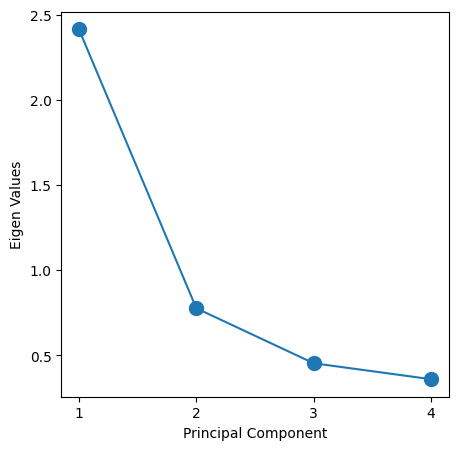

In [151]:
# scree plot (Eigen Values against sorted PCs)
plt.figure(figsize=(5, 5))
plt.xlabel("Principal Component")
plt.ylabel("Eigen Values")
plt.xticks(np.arange(1, 5)) 
plt.plot(np.arange(1,5), pca4.explained_variance_)
plt.scatter(np.arange(1,5), pca4.explained_variance_, s = 100)
plt.savefig(r'figures\Scree-PCA_buzzQ8.png', transparent = "true")

In [152]:
# print components
print('\nPrincipal Components')
print(pca4.components_)
print('\nExplained Variance Proportion by Component')
print(expldvarpca4)
print('\nEigen Values of Correlation Matrix')
print(pca4.explained_variance_)


Principal Components
[[ 0.54362357  0.51126957  0.54886633  0.37659341]
 [ 0.1270135   0.33932725  0.18491386 -0.91352693]
 [ 0.5397516  -0.77445054  0.29212109 -0.15349213]
 [ 0.63008666  0.15390517 -0.76106365 -0.00927995]]

Explained Variance Proportion by Component
[0.60355006 0.1937999  0.11303721 0.08961282]

Eigen Values of Correlation Matrix
[2.41420026 0.77519959 0.45214886 0.3584513 ]


In [153]:
# Creating a dataframe with 4 PC 
pcs4df = pd.DataFrame(pcs4, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
print(pcs4df)

         PC1       PC2       PC3       PC4
0  -0.591216  1.120419 -0.739575  0.994585
1   1.615992  0.286131  0.763648  1.010510
2  -1.644376  0.055875  0.700252 -0.432820
3   2.806445 -0.742427 -0.229837  0.737825
4   0.662450 -1.017549 -0.274396  0.350745
..       ...       ...       ...       ...
57  1.745896  0.049794  0.073061  0.625717
58 -0.144094  2.643883  1.190069 -0.034036
59  0.695724  1.874180 -0.769292  0.163062
60  2.973264  0.158961  0.468080 -0.692292
61 -0.003581  0.489791 -0.728942  0.402951

[62 rows x 4 columns]


In [154]:
# Adding const to store the intercept coefficient
pcs4df['const'] = 1.0

# Creating the regression model
linreg5 = sm.OLS(y, pcs4df).fit()

print(linreg5.summary())

                            OLS Regression Results                            
Dep. Variable:              log10_box   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     12.78
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           1.72e-07
Time:                        19:21:24   Log-Likelihood:                -12.270
No. Observations:                  62   AIC:                             34.54
Df Residuals:                      57   BIC:                             45.18
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1            0.1693      0.025      6.680      0.0

In [155]:
print('\nCumulative sum of the explained variance')
print(expldvarsum4)


Cumulative sum of the explained variance
[0.60355006 0.79734996 0.91038718 1.        ]


# Question 9

In [156]:
# Storing necessary variables in trad to prepare for linear regression
trad = pd.DataFrame(bf, columns=['G','PG','PG13','log10_budget','starpowr','sequel','action','comedy','animated','horror'])
trad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   G             62 non-null     int64  
 1   PG            62 non-null     int64  
 2   PG13          62 non-null     int64  
 3   log10_budget  62 non-null     float64
 4   starpowr      62 non-null     float64
 5   sequel        62 non-null     int64  
 6   action        62 non-null     int64  
 7   comedy        62 non-null     int64  
 8   animated      62 non-null     int64  
 9   horror        62 non-null     int64  
dtypes: float64(2), int64(8)
memory usage: 5.0 KB


In [157]:
# Combinging traditional variables and all 4 principal components in tradpc4

tradpc4 = pd.merge(trad,pcs4df, left_index=True, right_index=True)
tradpc4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   G             62 non-null     int64  
 1   PG            62 non-null     int64  
 2   PG13          62 non-null     int64  
 3   log10_budget  62 non-null     float64
 4   starpowr      62 non-null     float64
 5   sequel        62 non-null     int64  
 6   action        62 non-null     int64  
 7   comedy        62 non-null     int64  
 8   animated      62 non-null     int64  
 9   horror        62 non-null     int64  
 10  PC1           62 non-null     float64
 11  PC2           62 non-null     float64
 12  PC3           62 non-null     float64
 13  PC4           62 non-null     float64
 14  const         62 non-null     float64
dtypes: float64(7), int64(8)
memory usage: 7.4 KB


In [158]:
# Running linear regression

linreg6 = sm.OLS(y, tradpc4).fit()
print(linreg6.summary())

                            OLS Regression Results                            
Dep. Variable:              log10_box   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5.576
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           3.77e-06
Time:                        19:21:24   Log-Likelihood:                -1.7817
No. Observations:                  62   AIC:                             33.56
Df Residuals:                      47   BIC:                             65.47
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
G                0.2768      0.260      1.063   

# Question 10

In [159]:
tradpc4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   G             62 non-null     int64  
 1   PG            62 non-null     int64  
 2   PG13          62 non-null     int64  
 3   log10_budget  62 non-null     float64
 4   starpowr      62 non-null     float64
 5   sequel        62 non-null     int64  
 6   action        62 non-null     int64  
 7   comedy        62 non-null     int64  
 8   animated      62 non-null     int64  
 9   horror        62 non-null     int64  
 10  PC1           62 non-null     float64
 11  PC2           62 non-null     float64
 12  PC3           62 non-null     float64
 13  PC4           62 non-null     float64
 14  const         62 non-null     float64
dtypes: float64(7), int64(8)
memory usage: 7.4 KB


In [160]:
# Regression for Kaiser's 60% threshold : PC1

x60 = tradpc4.copy()

# Dropping the unnecessary variables
x60 = x60.drop(['PC2', 'PC3', 'PC4'], axis =1)

In [161]:
# Creating the regression model
linreg7 = sm.OLS(y, x60).fit()
print(linreg7.summary())

                            OLS Regression Results                            
Dep. Variable:              log10_box   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     6.510
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           1.39e-06
Time:                        19:21:24   Log-Likelihood:                -4.5682
No. Observations:                  62   AIC:                             33.14
Df Residuals:                      50   BIC:                             58.66
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
G                0.1669      0.240      0.695   

In [162]:
# Regression for Kaiser's 70% threshold: PC1, PC2

x70 = tradpc4.copy()

# Dropping the unnecessary variables
x70 = x70.drop(['PC3', 'PC4'], axis =1)

In [163]:
# Creating the regression model
linreg8 = sm.OLS(y, x70).fit()
print(linreg8.summary())

                            OLS Regression Results                            
Dep. Variable:              log10_box   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     6.357
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           1.27e-06
Time:                        19:21:24   Log-Likelihood:                -3.0189
No. Observations:                  62   AIC:                             32.04
Df Residuals:                      49   BIC:                             59.69
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
G                0.2142      0.239      0.898   

In [164]:
# Regression for Kaiser's 80% & 90% threshold: PC1, PC2, PC3

x8090 = tradpc4.copy()

# Dropping the unnecessary variables
x8090 = x8090.drop(['PC4'], axis =1)

In [165]:
# Creating the regression model
linreg9 = sm.OLS(y, x8090).fit()
print(linreg9.summary())

                            OLS Regression Results                            
Dep. Variable:              log10_box   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     5.752
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           3.32e-06
Time:                        19:21:24   Log-Likelihood:                -3.0054
No. Observations:                  62   AIC:                             34.01
Df Residuals:                      48   BIC:                             63.79
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
G                0.2013      0.257      0.783   

# Question 11

In [166]:
# Preparing for regression

buzz = bf.copy()

# Dropping the unnecessary variables
buzz = buzz.drop(['box','G','PG','PG13','budget','starpowr','sequel','action','comedy','animated','horror','addict','cmngsoon','fandango','log10_box','log10_budget'], axis=1)

In [167]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   box             62 non-null     int64  
 1   G               62 non-null     int64  
 2   PG              62 non-null     int64  
 3   PG13            62 non-null     int64  
 4   budget          62 non-null     float64
 5   starpowr        62 non-null     float64
 6   sequel          62 non-null     int64  
 7   action          62 non-null     int64  
 8   comedy          62 non-null     int64  
 9   animated        62 non-null     int64  
 10  horror          62 non-null     int64  
 11  addict          62 non-null     float64
 12  cmngsoon        62 non-null     int64  
 13  fandango        62 non-null     int64  
 14  cntwait3        62 non-null     float64
 15  log10_box       62 non-null     float64
 16  log10_budget    62 non-null     float64
 17  log10_addict    62 non-null     float

In [168]:
# Variables we want are cntwait3, log10_addict, log10_cmngsoon, log10_fandango, log10_budget, starpowr

In [169]:
# Preparing for regression

x11 = bf.copy()

# Dropping the unnecessary variables
x11 = x11.drop(['box','G','PG','PG13','budget','sequel','action','comedy','animated','horror','addict','cmngsoon','fandango','log10_box'], axis=1)

In [170]:
x11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   starpowr        62 non-null     float64
 1   cntwait3        62 non-null     float64
 2   log10_budget    62 non-null     float64
 3   log10_addict    62 non-null     float64
 4   log10_cmngsoon  62 non-null     float64
 5   log10_fandango  62 non-null     float64
dtypes: float64(6)
memory usage: 3.0 KB


In [171]:
sc11 = prep.StandardScaler()

sx11 = pd.DataFrame(sc.fit_transform(x11), columns = x11.columns)

# calculate the sample standard deviation of the result and scale by dividing with it 
sc11.scale_ = np.std(sx11, axis=0, ddof=1).to_list()

sx11 = sx11/sc11.scale_

In [172]:
# create pca object
pca6 = PCA()

#pass the feature set 
pcs6 = pca6.fit_transform(sx11)

In [173]:
print('\nEigen Values of Correlation Matrix')
print(pca6.explained_variance_)


Eigen Values of Correlation Matrix
[2.83823382 1.45442671 0.70232212 0.44299297 0.34049709 0.2215273 ]


In [174]:
# Explained variance to get the proportion of variance explained by each PC
expldvarpca6 = pca6.explained_variance_ratio_
expldvarpca6

array([0.47303897, 0.24240445, 0.11705369, 0.07383216, 0.05674951,
       0.03692122])

In [175]:
expldvarsum6 = np.cumsum(expldvarpca6)
print('\nCumulative sum of the explained variance')
print(expldvarsum6)


Cumulative sum of the explained variance
[0.47303897 0.71544342 0.83249711 0.90632927 0.96307878 1.        ]


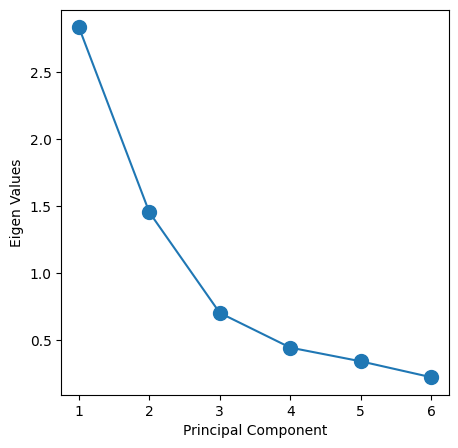

In [176]:
# scree plot (Eigen Values against sorted PCs)

plt.figure(figsize=(5, 5))

plt.xlabel("Principal Component")
plt.ylabel("Eigen Values")

plt.xticks(np.arange(1, 7)) 

plt.plot(np.arange(1,7), pca6.explained_variance_)

plt.scatter(np.arange(1,7), pca6.explained_variance_, s = 100)

plt.savefig(r'figures\Asg1-Q11-Scree-PCA.png', transparent = "true")

In [177]:
print('\nPrincipal Components')
print(pca6.components_)
print('\nExplained Variance Proportion by Component')
print(expldvarpca6)
print('\nEigen Values of Correlation Matrix')
print(pca6.explained_variance_)


Principal Components
[[-0.24354716 -0.51720116 -0.434969   -0.40048435 -0.42290479 -0.3804649 ]
 [-0.66977854  0.05652287 -0.40782831  0.40376224  0.45426654 -0.11178511]
 [ 0.24917939  0.32680094  0.07030385  0.19651156 -0.0031937  -0.88743515]
 [ 0.1751475  -0.27819718 -0.11952631  0.79075495 -0.48920846  0.11412638]
 [-0.53090539 -0.22614273  0.78223141  0.07914513 -0.16018966 -0.15227696]
 [ 0.34271552 -0.7028336   0.11559798  0.08008871  0.5914369  -0.13782705]]

Explained Variance Proportion by Component
[0.47303897 0.24240445 0.11705369 0.07383216 0.05674951 0.03692122]

Eigen Values of Correlation Matrix
[2.83823382 1.45442671 0.70232212 0.44299297 0.34049709 0.2215273 ]


# Question 12

In [178]:
# Creating a dataframe with 6 PC 
pcs6df = pd.DataFrame(pcs6, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6'])
print(pcs6df)

         PC1       PC2       PC3       PC4       PC5       PC6
0   0.727800  0.038162  1.204158  1.123466 -0.117357 -0.448392
1  -2.637946 -1.370233  1.077239 -0.251879  0.013417 -0.366720
2   1.542932 -0.469245  0.076520 -0.857879  0.278870  0.224304
3  -3.605130 -0.458782 -0.388755  0.345631  0.690654 -0.445240
4  -1.453419 -0.892621 -0.777003  0.150703  1.127304 -0.218117
..       ...       ...       ...       ...       ...       ...
57 -2.870020 -1.454298  0.723402  0.275331  0.139703  0.201002
58  1.015619  2.049672  2.170410 -1.181606  0.225858 -0.428071
59  0.412522  2.404608  1.172586  0.762127 -0.042936 -0.285026
60 -2.919339  1.181531 -0.091520 -0.711417  0.114676  0.378143
61  0.933144  1.094761  0.242295  1.012984 -1.199726 -0.388103

[62 rows x 6 columns]


In [179]:
#add new constant column for the intercept
pcs6df['const'] = 1.0

In [180]:
pcs6df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     62 non-null     float64
 1   PC2     62 non-null     float64
 2   PC3     62 non-null     float64
 3   PC4     62 non-null     float64
 4   PC5     62 non-null     float64
 5   PC6     62 non-null     float64
 6   const   62 non-null     float64
dtypes: float64(7)
memory usage: 3.5 KB


In [181]:
# Regression for 60 & 70% threshold: PC1, PC2

x12a = pcs6df.copy()

# Dropping the unnecessary variables
x12a = x12a.drop(['PC3','PC4','PC5','PC6'], axis=1)

# Creating the regression model
linreg12a = sm.OLS(y, x12a).fit()

print(linreg12a.summary())

                            OLS Regression Results                            
Dep. Variable:              log10_box   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     22.31
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           6.10e-08
Time:                        19:21:25   Log-Likelihood:                -14.662
No. Observations:                  62   AIC:                             35.32
Df Residuals:                      59   BIC:                             41.71
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1           -0.1577      0.024     -6.605      0.0

In [182]:
# Regression for 80% threshold: PC1, PC2, PC3

x12b = pcs6df.copy()

# Dropping the unnecessary variables
x12b = x12b.drop(['PC4','PC5','PC6'], axis=1)

# Creating the regression model
linreg12b = sm.OLS(y, x12b).fit()

print(linreg12b.summary())

                            OLS Regression Results                            
Dep. Variable:              log10_box   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     15.72
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           1.35e-07
Time:                        19:21:25   Log-Likelihood:                -13.675
No. Observations:                  62   AIC:                             35.35
Df Residuals:                      58   BIC:                             43.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1           -0.1577      0.024     -6.654      0.0

In [183]:
# Regression for 90% threshold: PC1, PC2, PC3, PC4

x12c = pcs6df.copy()

# Dropping the unnecessary variables
x12c = x12c.drop(['PC5','PC6'], axis=1)

# Creating the regression model
linreg12c = sm.OLS(y, x12c).fit()

print(linreg12c.summary())

                            OLS Regression Results                            
Dep. Variable:              log10_box   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     11.69
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           5.34e-07
Time:                        19:21:25   Log-Likelihood:                -13.552
No. Observations:                  62   AIC:                             37.10
Df Residuals:                      57   BIC:                             47.74
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1           -0.1577      0.024     -6.610      0.0